In [2]:
from __future__ import print_function
import numpy as np
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
from six.moves import range

pickle_file = 'SVHN_64x64x1_test.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    test_dataset = save['train_dataset']
    test_labels = save['train_labels']
    del save  # hint to help gc free up memory
    print('Test set', test_dataset.shape, test_labels.shape)

test_dataset = test_dataset.astype('float32')
test_labels = test_labels.astype('uint8')
from keras.layers import Input, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation, Dense
from keras.constraints import maxnorm
from keras.models import Model

Test set (13068, 64, 64, 1) (13068, 6)


Using TensorFlow backend.


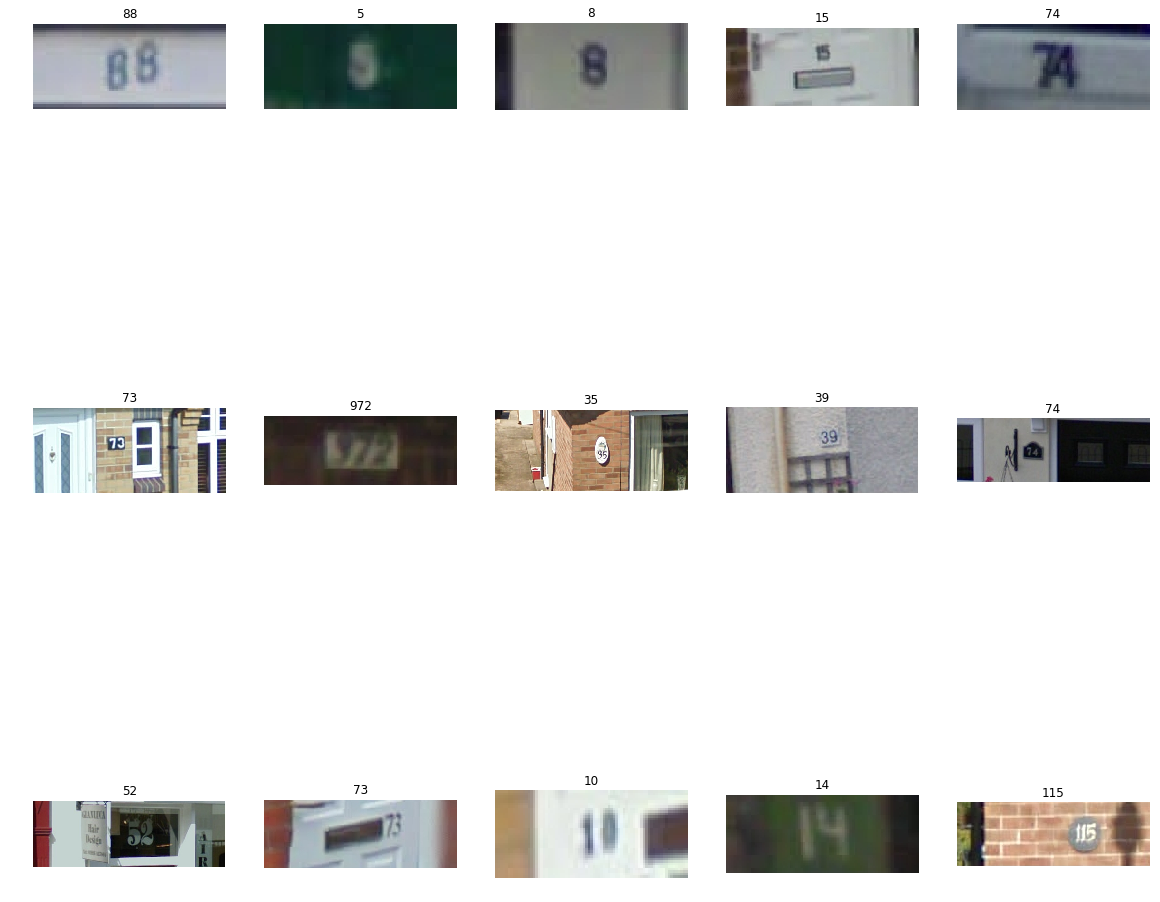

In [3]:
from PIL import Image
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 20.0)
f, ax = plt.subplots(nrows=3, ncols=5)

im_samples = []

for row in range(3):
    for i, j in enumerate(np.sort(np.random.randint(0, test_labels.shape[0], size=5))):
        filename = str(j+1)+'.png'
        fullname = os.path.join('C:/Users/sreekar/Desktop/UdacityProject/data/test', filename)
        im = Image.open(fullname)
        house_num = ''
        for k in np.arange(test_labels[j,0]):
            house_num += str(test_labels[j,k+1])
        im_samples.extend([j])
        ax[row, i].axis('off')
        ax[row, i].set_title(house_num, loc='center')
        ax[row, i].imshow(im)

In [4]:
image_width = 64
image_height = 64
num_labels = 11 # 0-9, + blank 
num_channels = 1 # greyscale

depth1 = 32
depth2 = 48
depth3 = 64
depth4 = 80
depth5 = 128
depth6 = 144
depth7 = 160

he = 'he_normal'
w = 3

x = Input(shape = (image_width, image_height, num_channels))

y = Convolution2D(filters=depth1, kernel_size=(3, 3), kernel_initializer=he, kernel_constraint=maxnorm(w), padding='same', name="block1_conv1")(x)
y = Activation('relu', name="block1_act1")(y)
y = BatchNormalization(name="block1_bnorm1")(y)
y = MaxPooling2D(name="block1_pool1")(y)
y = Dropout(0.2, name="block1_drop1")(y)

y = Convolution2D(filters=depth2, kernel_size=(3, 3), kernel_initializer=he, kernel_constraint=maxnorm(w), padding='same', name="block2_conv1")(y)
y = Activation('relu', name="block2_act1")(y)
y = BatchNormalization(name="block2_bnorm1")(y)
y = Convolution2D(filters=depth3, kernel_size=(3, 3), kernel_initializer=he, kernel_constraint=maxnorm(w), padding='same', name="block2_conv2")(y)
y = Activation('relu', name="block2_act2")(y)
y = BatchNormalization(name="block2_bnorm2")(y)
y = MaxPooling2D(name="block2_pool1")(y)
y = Dropout(0.4, name="block2_drop2")(y)

y = Convolution2D(filters=depth4, kernel_size=(3, 3), kernel_initializer=he, kernel_constraint=maxnorm(w), padding='same', name="block3_conv1")(y)
y = Activation('relu', name="block3_act1")(y)
y = BatchNormalization(name="block3_bnorm1")(y)
y = MaxPooling2D(name="block3_pool1")(y)
y = Dropout(0.3, name="block3_drop1")(y)
y = Convolution2D(filters=depth5, kernel_size=(3, 3), kernel_initializer=he, kernel_constraint=maxnorm(w), padding='same', name="block3_conv2")(y)
y = Activation('relu', name="block3_act2")(y)
y = BatchNormalization(name="block3_bnorm2")(y)
y = MaxPooling2D(name="block3_pool2")(y)
y = Dropout(0.4, name="block3_drop2")(y)

y = Convolution2D(filters=depth6, kernel_size=(3, 3), kernel_initializer=he, kernel_constraint=maxnorm(w), padding='same', name="block4_conv1")(y)
y = Activation('relu', name="block4_act1")(y)
y = BatchNormalization(name="block4_bnorm1")(y)
y = Dropout(0.3, name="block4_drop1")(y)
y = Convolution2D(filters=depth7, kernel_size=(3, 3), kernel_initializer=he, kernel_constraint=maxnorm(w), padding='same', name="block4_conv2")(y)
y = Activation('relu', name="block4_act2")(y)
y = BatchNormalization(name="block4_bnorm2")(y)
y = MaxPooling2D(name="block4_pool1")(y)
y = Dropout(0.5, name="block4_drop2")(y)

h = Flatten(name="feature_vector")(y)

probs1 = Dense(units = num_labels, kernel_initializer = he, activation="softmax", name="digit1")(h)
probs2 = Dense(units = num_labels, kernel_initializer = he, activation="softmax", name="digit2")(h)
probs3 = Dense(units = num_labels, kernel_initializer = he, activation="softmax", name="digit3")(h)
probs4 = Dense(units = num_labels, kernel_initializer = he, activation="softmax", name="digit4")(h)
probs5 = Dense(units = num_labels, kernel_initializer = he, activation="softmax", name="digit5")(h)

out = [probs1, probs2, probs3, probs4, probs5]
model = Model(inputs=x, outputs=out)

# model.summary()
model.load_weights("saved/phase_2.hdf5")
print('initialized')

initialized


In [5]:
batch_predictions = model.predict_on_batch(x = test_dataset[im_samples, :, :, :])
predictions = np.asarray(batch_predictions)
test_pred = np.argmax(predictions, 2).T
print(test_pred)

[[ 6  8 10 10 10]
 [ 9 10 10 10 10]
 [ 8 10 10 10 10]
 [ 1  5 10 10 10]
 [ 7  4 10 10 10]
 [ 7  3 10 10 10]
 [ 3  7  2 10 10]
 [ 3  5 10 10 10]
 [ 3  9 10 10 10]
 [ 7  4 10 10 10]
 [ 5  2 10 10 10]
 [ 7  3 10 10 10]
 [ 1  0 10 10 10]
 [ 1  4 10 10 10]
 [ 1  1  5 10 10]]


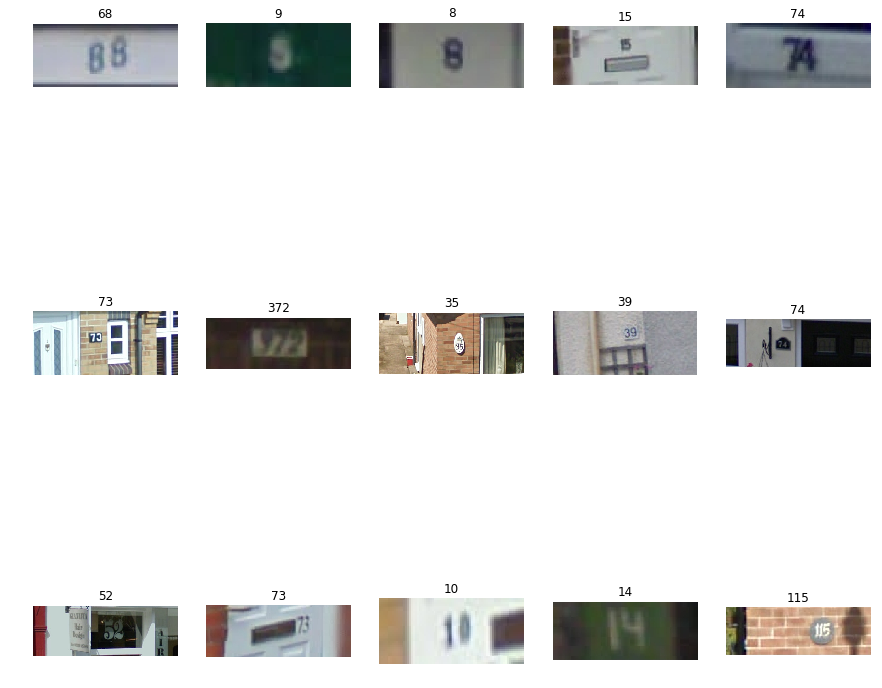

In [6]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
f, ax = plt.subplots(nrows=3, ncols=5)
l = 0 
for row in range(3):
    for i, j in enumerate(im_samples[l:l+5]):
        filename = str(j+1)+'.png'
        fullname = os.path.join('C:/Users/sreekar/Desktop/UdacityProject/data/test', filename)
        im = Image.open(fullname)
        house_num = ''
        for k in np.arange(np.sum(test_pred[l+i,:] != 10)):
            house_num += str(test_pred[l+i,k])

        ax[row, i].axis('off')
        ax[row, i].set_title(house_num, loc='center')
        ax[row, i].imshow(im)
    l+=5  

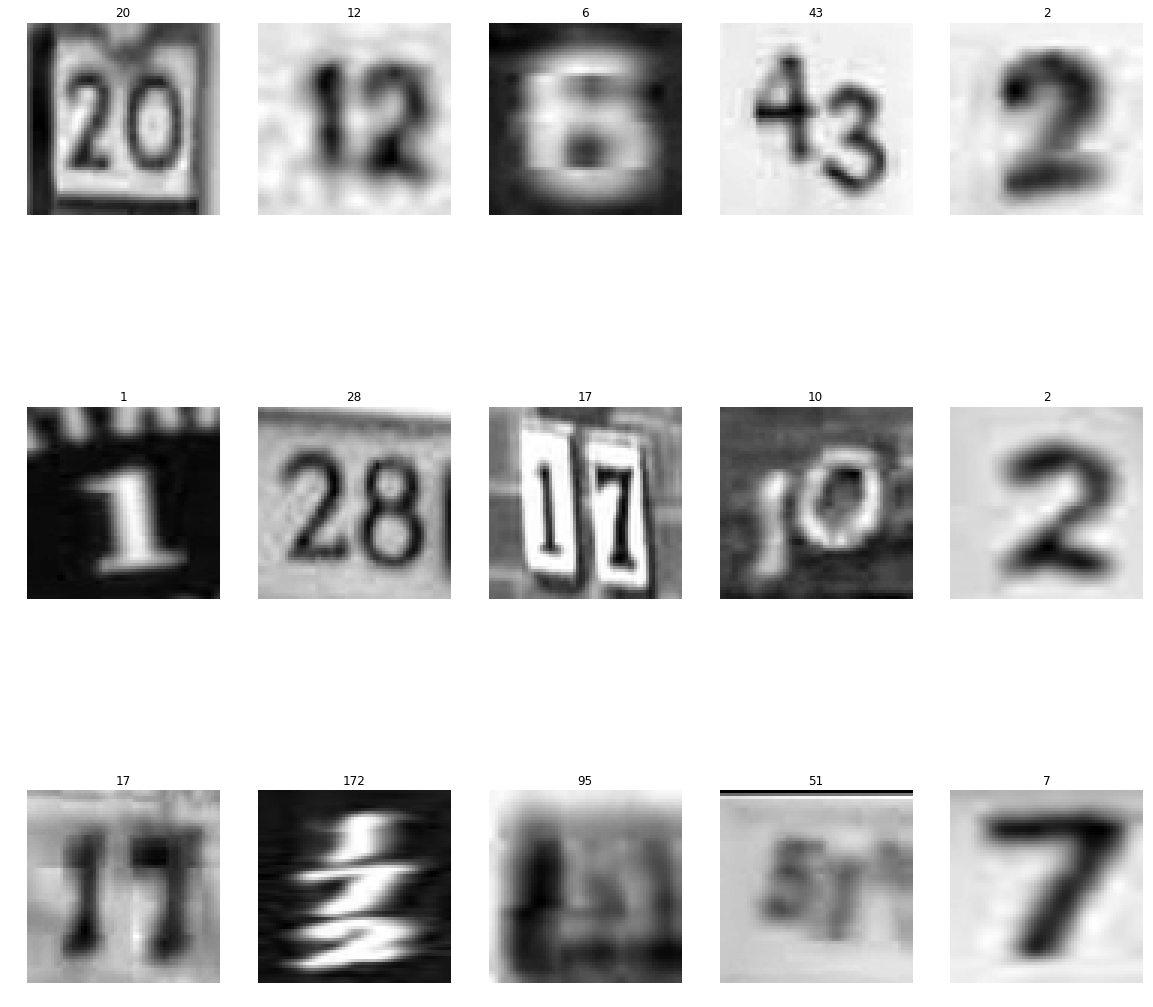

In [11]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
f, ax = plt.subplots(nrows=3, ncols=5)

im_samples = []

for row in range(3):
    for i, j in enumerate(np.sort(np.random.randint(0, test_labels.shape[0], size=5))):
        im = test_dataset[j]
        house_num = ''
        for k in np.arange(test_labels[j,0]):
            house_num += str(test_labels[j,k+1])
        im_samples.extend([j])
        ax[row, i].axis('off')
        ax[row, i].set_title(house_num, loc='center')
        ax[row, i].imshow(im[:,:,0], cmap='gray')

In [12]:
batch_predictions = model.predict_on_batch(x = test_dataset[im_samples, :, :, :])
predictions = np.asarray(batch_predictions)
test_pred = np.argmax(predictions, 2).T
print(test_pred)

[[ 2  0 10 10 10]
 [ 1  2 10 10 10]
 [ 6 10 10 10 10]
 [ 4  3 10 10 10]
 [ 2 10 10 10 10]
 [ 1 10 10 10 10]
 [ 2  8 10 10 10]
 [ 1  7 10 10 10]
 [ 1  0 10 10 10]
 [ 2 10 10 10 10]
 [ 1  7 10 10 10]
 [ 4  2  3 10 10]
 [ 3  3 10 10 10]
 [ 5  7 10 10 10]
 [ 7 10 10 10 10]]


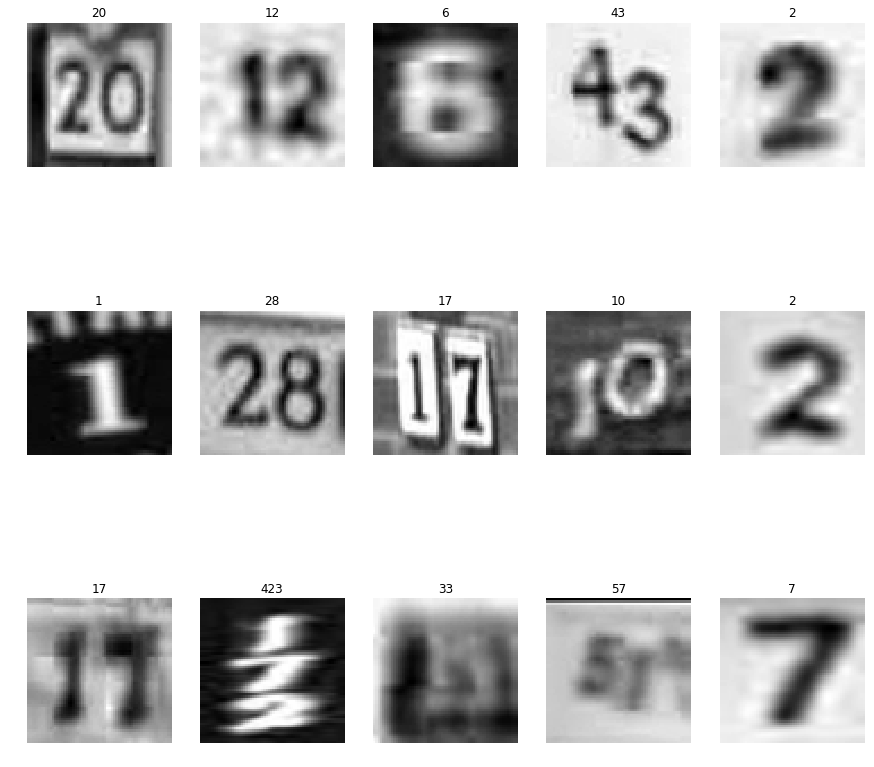

In [15]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
f, ax = plt.subplots(nrows=3, ncols=5)
l = 0 
for row in range(3):
    for i, j in enumerate(im_samples[l:l+5]):
        im = test_dataset[j]
        house_num = ''
        for k in np.arange(np.sum(test_pred[l+i,:] != 10)):
            house_num += str(test_pred[l+i,k])

        ax[row, i].axis('off')
        ax[row, i].set_title(house_num, loc='center')
        ax[row, i].imshow(im[:,:,0], cmap='gray')
    l+=5